# Movie Rating Prediction Project

## Task Description

In this project, we aim to build a model that predicts the rating of Indian movies based on various features such as genre, director, and actors. The goal is to accurately estimate the ratings given to movies by users or critics. Movie rating prediction involves data analysis, preprocessing, feature engineering, and regression modeling techniques.

## Motive

Understanding the factors that influence movie ratings is crucial for movie studios, filmmakers, and critics. This project provides valuable insights into what makes a movie successful in the eyes of the audience and allows us to develop a model for rating estimation.

## Data Source

The dataset used in this project is the "IMDb Movies India" dataset. It contains information about Indian movies, including their titles, genres, directors, actors, and ratings. The dataset is publicly available and has been collected from IMDb.

**Dataset Details:**

- Total Records: [Specify the number of records]
- Features: [List the features available in the dataset]
- Target: Movie Rating (Target variable we want to predict)

This dataset provides us with a rich source of information to explore the relationships between different movie features and their ratings.

In the following sections, we will perform data preprocessing, feature engineering, model selection, and evaluation to develop a robust movie rating prediction model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data_path = '/kaggle/input/moviedata/IMDb Movies India.csv'
movie = pd.read_csv(data_path, encoding='latin1')
movie.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
movie.tail(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [4]:
#information about the data
print(movie.shape, "\n")
print(movie.head(), "\n")
print(movie.describe(), "\n")

(15509, 10) 

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant 

# **Explorartory Data Analysis** 

In [5]:
#nulls in the dataset
print(movie.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


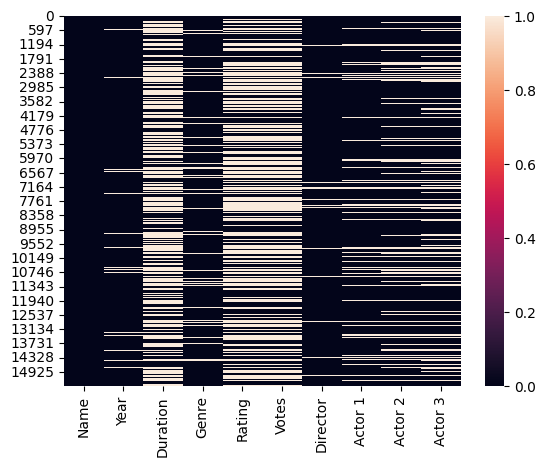

In [6]:
sns.heatmap(movie.isnull());

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = (movie.isnull().mean() * 100).round(2)

# Display the columns with their respective missing percentage
print(missing_percentage)


Name         0.00
Year         3.40
Duration    53.32
Genre       12.10
Rating      48.94
Votes       48.93
Director     3.39
Actor 1     10.43
Actor 2     15.37
Actor 3     20.27
dtype: float64


In [8]:
movie.dropna(subset=['Rating'], inplace=True)
missing_percentage = (movie.isnull().sum() / movie.isnull().count() * 100).sort_values(ascending=False)
print(missing_percentage)

Duration    26.114408
Actor 3      3.687334
Actor 2      2.525571
Actor 1      1.578482
Genre        1.288041
Director     0.063139
Name         0.000000
Year         0.000000
Rating       0.000000
Votes        0.000000
dtype: float64


In [9]:
columns_to_dropna = ['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']
movie.dropna(subset=columns_to_dropna, inplace=True)
missing_percentage = (movie.isnull().sum() / movie.isnull().count() * 100).sort_values(ascending=False)
print(missing_percentage)

Duration    25.125695
Name         0.000000
Year         0.000000
Genre        0.000000
Rating       0.000000
Votes        0.000000
Director     0.000000
Actor 1      0.000000
Actor 2      0.000000
Actor 3      0.000000
dtype: float64


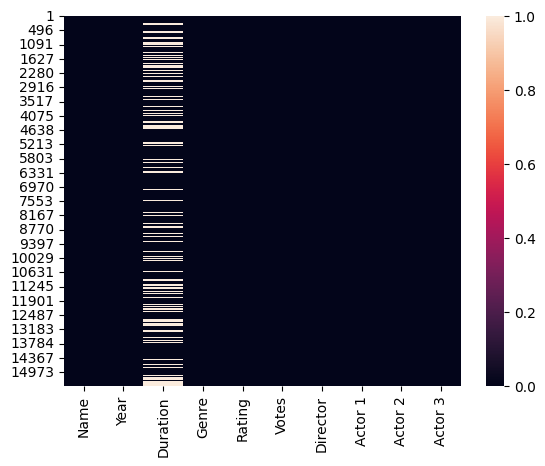

In [10]:
sns.heatmap(movie.isnull());

In [11]:
import pandas as pd

#custom function to clean the 'Duration' column
def clean_duration(duration):
    if isinstance(duration, str):
        return float(''.join(filter(str.isdigit, duration)))
    return duration

#Applying the custom function
movie['Duration'] = movie['Duration'].apply(clean_duration)

mean_duration = movie['Duration'].mean()
movie['Duration'].fillna(mean_duration, inplace=True)


In [12]:
print(movie.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


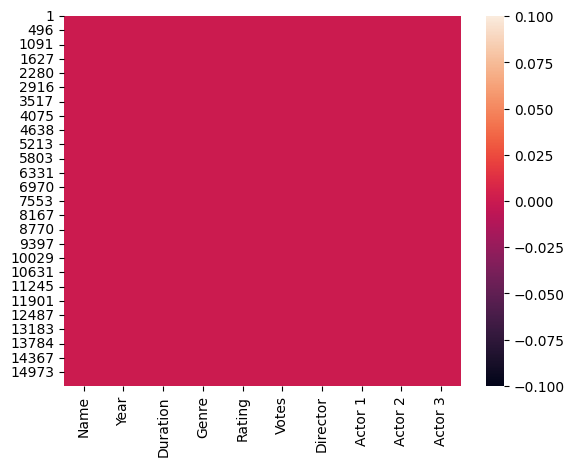

In [13]:
sns.heatmap(movie.isnull());

In [14]:
print(movie.shape)
movie.drop_duplicates(inplace=True)

(7558, 10)


In [15]:
movie['Year'] = movie['Year'].apply(lambda x: x.split(')')[0])
year_lst = []
for val in movie['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
movie['Year'] = year_lst

#Removing commas and convert the 'Votes' column to an integer data type
movie['Votes'] = movie['Votes'].str.replace(',', '').astype(int)

#Converting the 'Year' column to an integer data type
movie['Year'] = movie['Year'].astype(int)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


# **Data Visualization**

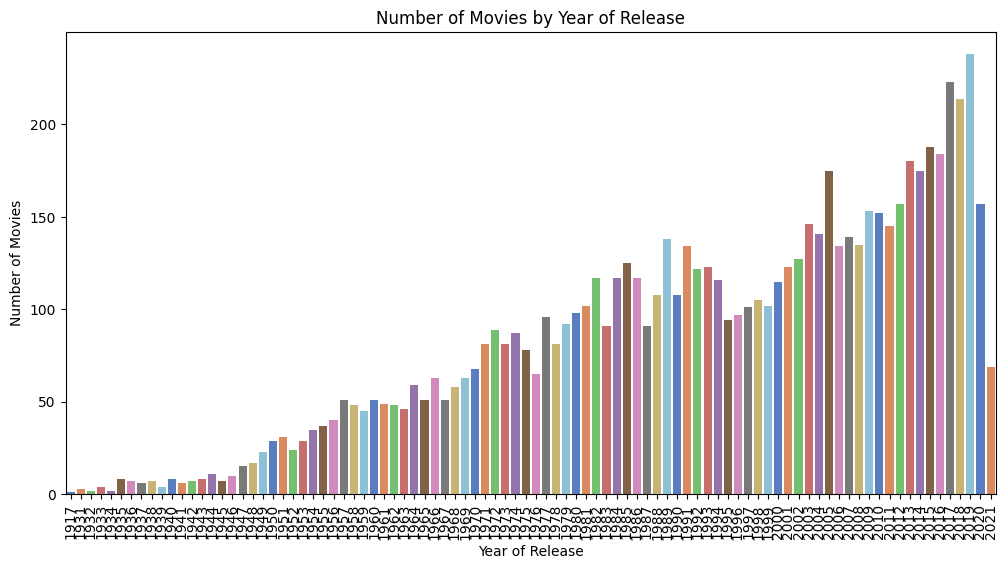

In [16]:
#number of movies released in each year
movies_by_year = movie['Year'].value_counts().sort_index()

#number of movies by year
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_year.index, y=movies_by_year.values, palette='muted')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year of Release')
plt.xticks(rotation=90)
plt.show()


**Genre Analysis**

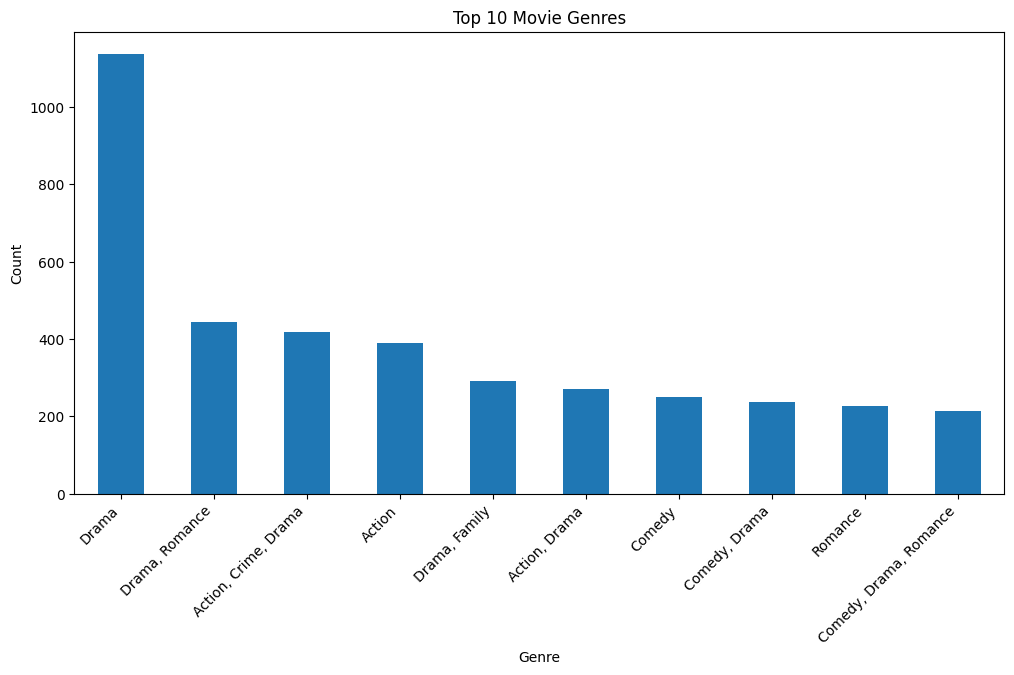

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

genre_counts = movie['Genre'].value_counts()
top_genres = genre_counts.head(10)
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


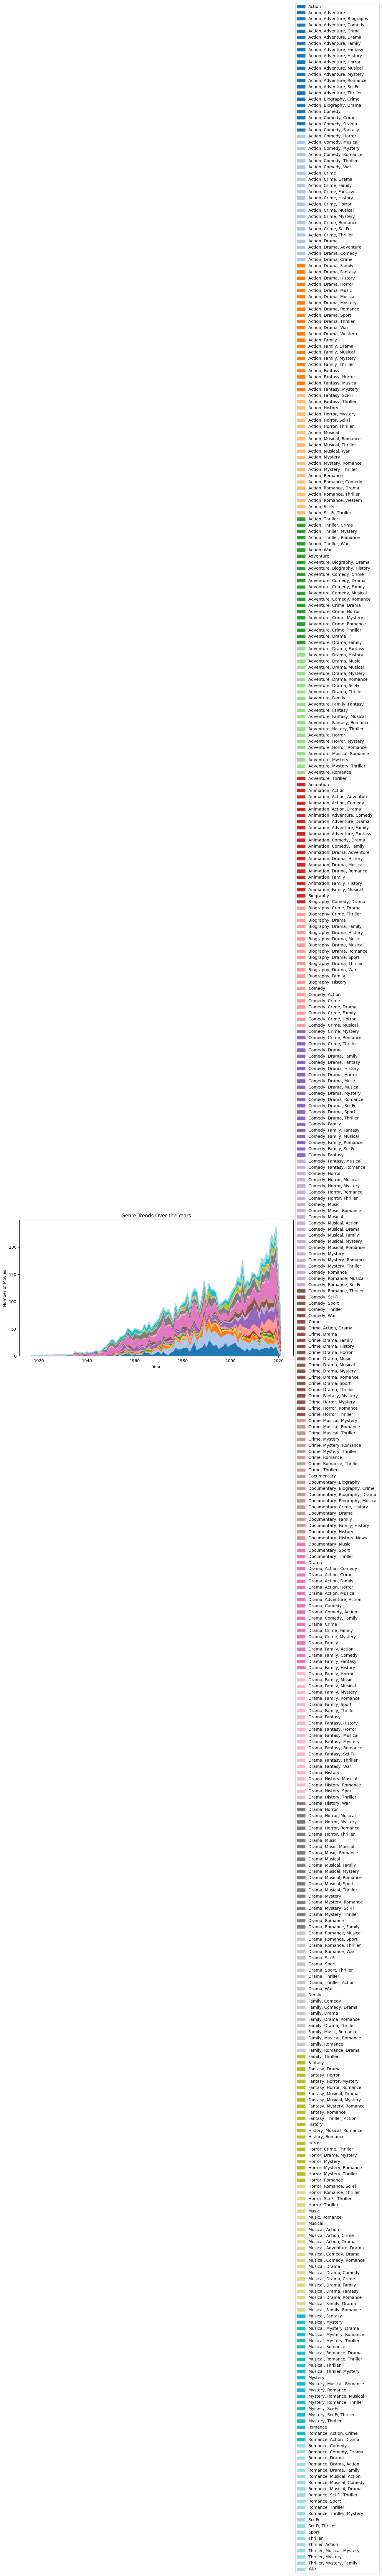

In [18]:
#number of movies in each genre for each year
genre_trends = movie.groupby(['Year', 'Genre'])['Name'].count().unstack()

#stacked area plot to visualize the genre trends over the years
ax = genre_trends.plot(kind='area', figsize=(12, 6), cmap='tab20', legend=True, stacked=True)
ax.set_title('Genre Trends Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


**Actor Analysis**

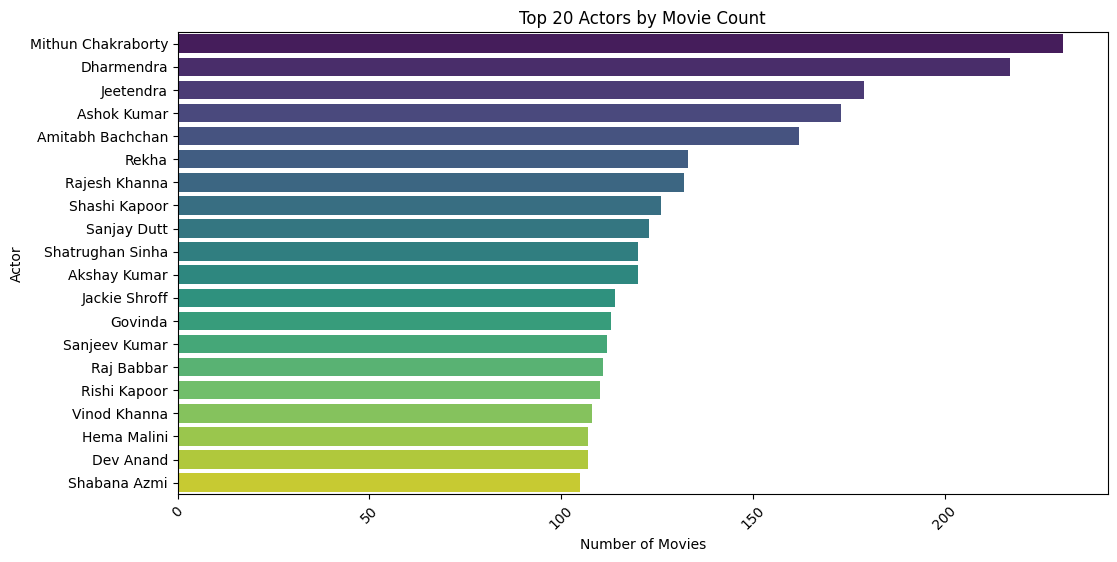

In [19]:
actors = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']])

#number of movies each actor has appeared in
top_actors_movie_count = actors.value_counts().head(20)

#top 20 actors by movie count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors_movie_count.values, y=top_actors_movie_count.index, palette="viridis")
plt.title('Top 20 Actors by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.show()

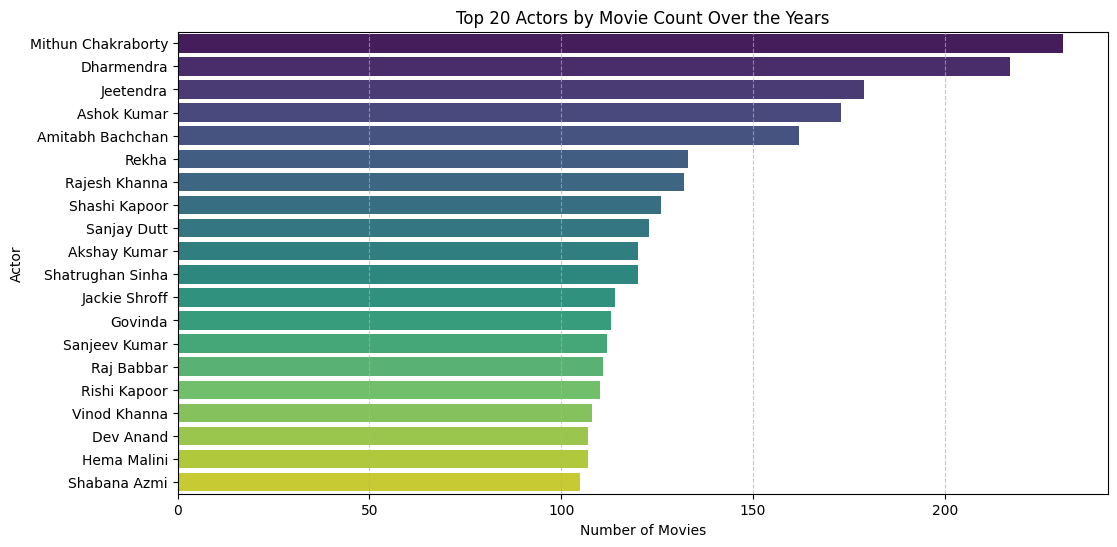

In [20]:
#count of movies by each actor
actor_movie_counts = movie[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts().sort_values(ascending=False)

#top 20 actors with the most movies
top_20_actors = actor_movie_counts.head(20)

#bar plot to display the top 20 actors by movie count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_actors.values, y=top_20_actors.index, palette='viridis')
plt.title('Top 20 Actors by Movie Count Over the Years')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


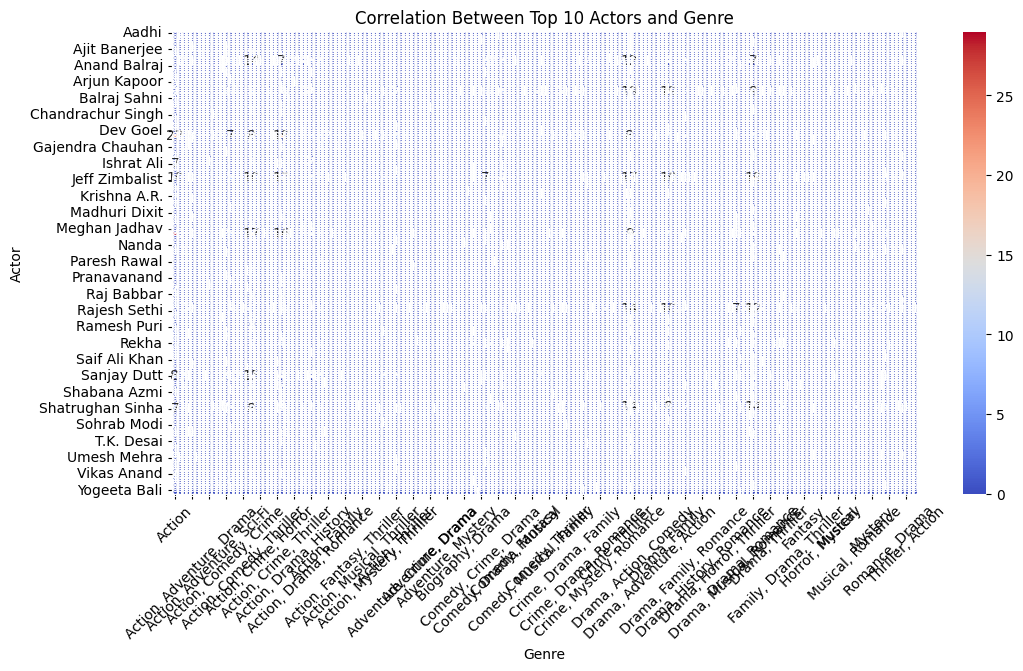

In [21]:
#DataFrame to include only the top 10 actors
top_10_actors = top_actors_movie_count.index[:10]
filtered_movie = movie[movie['Actor 1'].isin(top_10_actors) | movie['Actor 2'].isin(top_10_actors) | movie['Actor 3'].isin(top_10_actors)]

#pivot table to count the number of movies for each actor-genre combination
actor_genre_pivot = pd.crosstab(filtered_movie['Actor 1'], filtered_movie['Genre'])

#heatmap to visualize the correlation
plt.figure(figsize=(12, 6))
sns.heatmap(actor_genre_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title('Correlation Between Top 10 Actors and Genre')
plt.xlabel('Genre')
plt.ylabel('Actor')
plt.xticks(rotation=45)
plt.show()


In [22]:
movie['All_Actors'] = movie[['Actor 1', 'Actor 2', 'Actor 3']].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)
actors_votes = movie[['All_Actors', 'Votes']]
actors_votes = actors_votes.drop('All_Actors', axis=1).join(actors_votes['All_Actors'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Actor'))
top_actors_by_votes = actors_votes.groupby('Actor')['Votes'].sum().reset_index()
top_actors_by_votes = top_actors_by_votes.sort_values(by='Votes', ascending=False)

#top actors by total votes 
top_actors_by_votes.head(10)


,Actor,Votes
29,Aamir Khan,1552141
4757,Shah Rukh Khan,1481649
295,Akshay Kumar,1098024
4507,Salman Khan,955836
1932,Irrfan Khan,900503
425,Amitabh Bachchan,739016
147,Adil Hussain,636726
5319,Suraj Sharma,595013
4596,Sanjay Dutt,555622
2632,Madhavan,510588


**Directors Analysis**

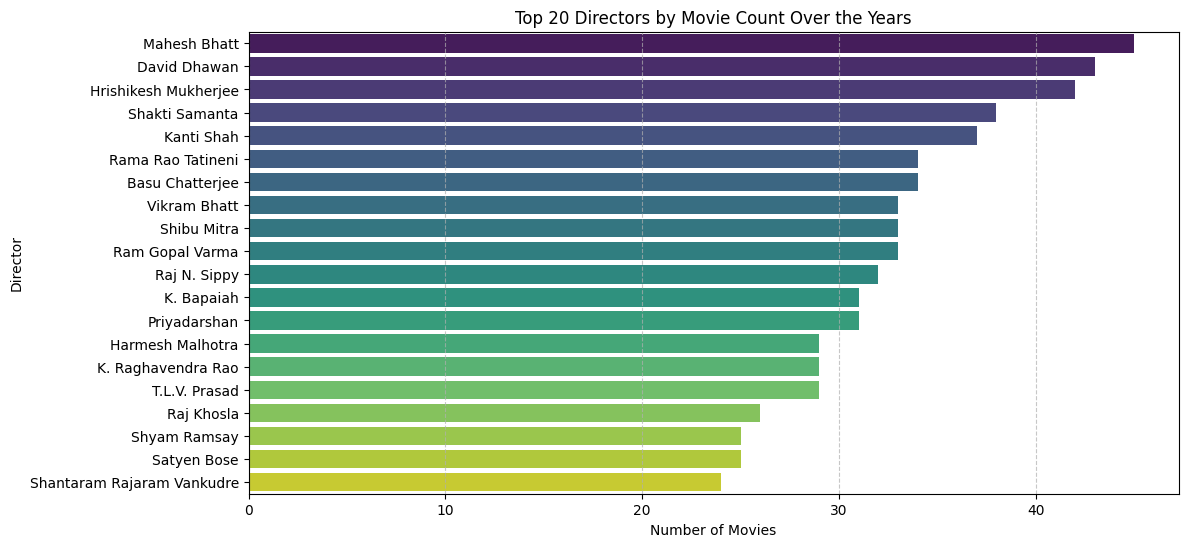

In [23]:
#count of movies by each director
director_movie_counts = movie['Director'].value_counts().sort_values(ascending=False)

#top 20 directors with the most movies
top_20_directors = director_movie_counts.head(20)

#bar plot to display the top 20 directors by movie count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_directors.values, y=top_20_directors.index, palette='viridis')
plt.title('Top 20 Directors by Movie Count Over the Years')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


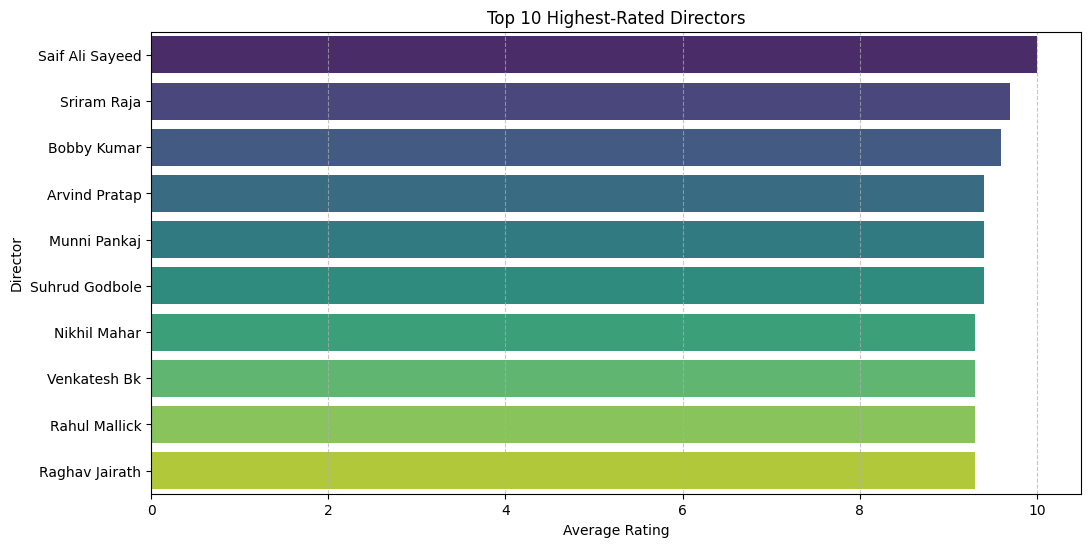

In [24]:
#movies by director and average rating for each director
director_ratings = movie.groupby('Director')['Rating'].mean().reset_index()

#directors by average rating in descending order
top_directors = director_ratings.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Director', data=top_directors, palette='viridis')
plt.title('Top 10 Highest-Rated Directors')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Duration, Rating, and Votes Analysis**

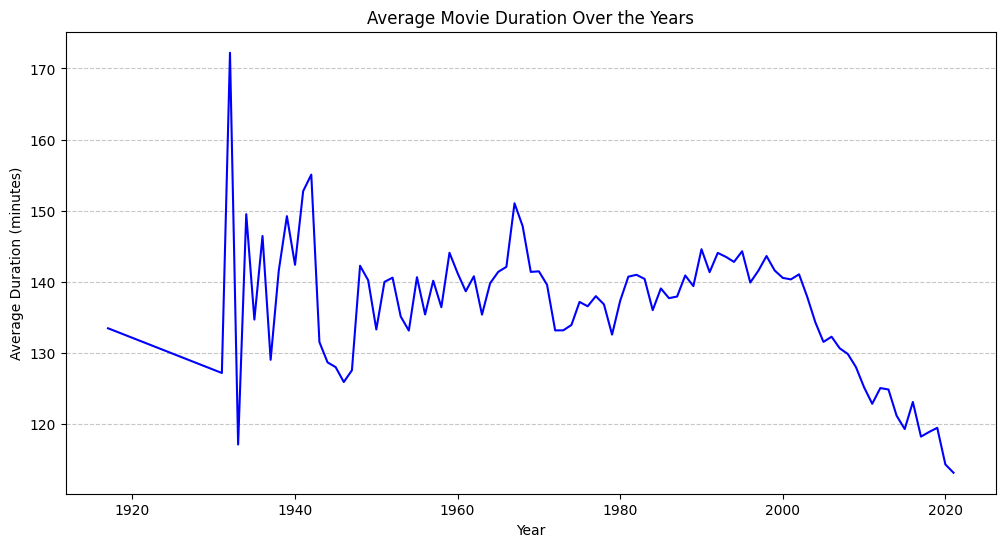

In [25]:
#movies by release year and average duration
average_duration_by_year = movie.groupby('Year')['Duration'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, color='blue')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


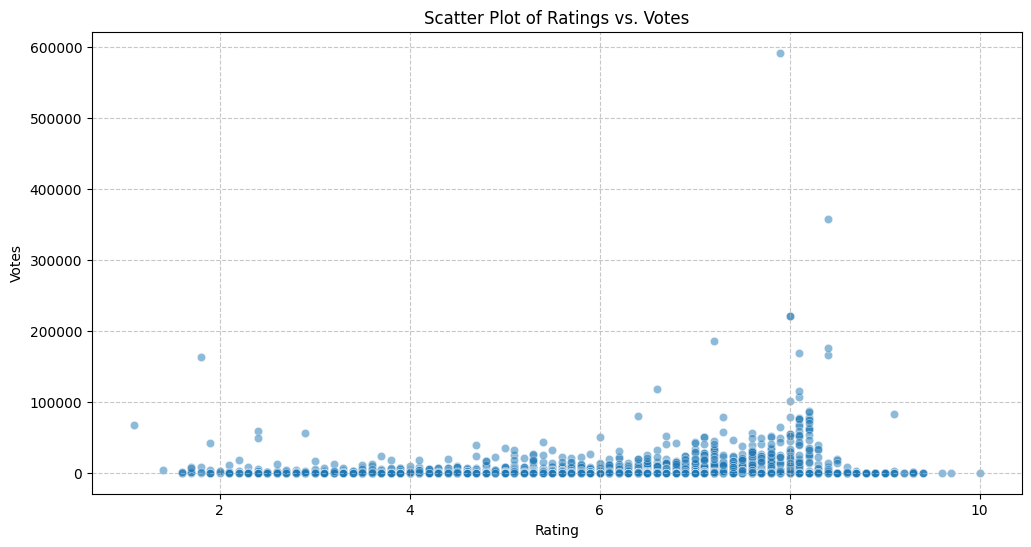

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Votes', data=movie, alpha=0.5)
plt.title('Scatter Plot of Ratings vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


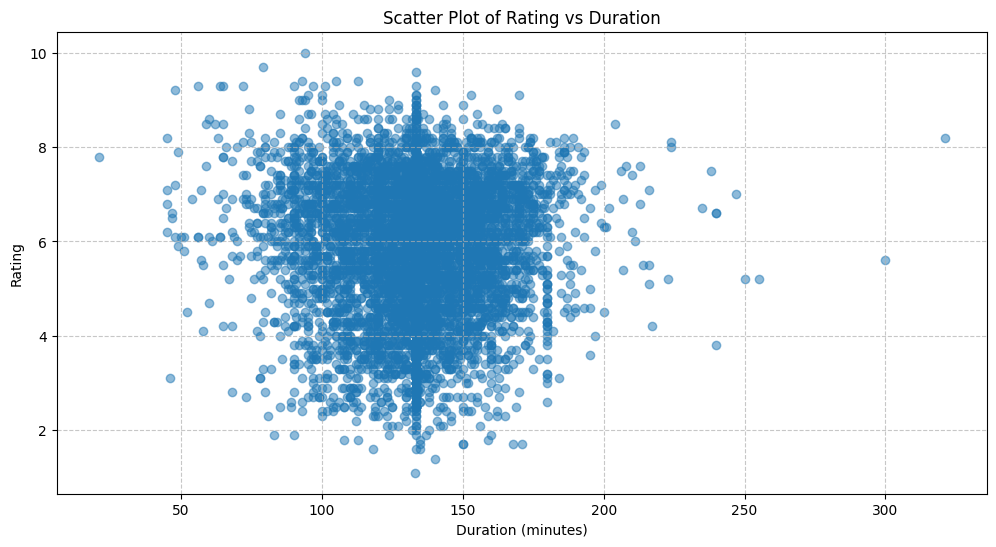

In [27]:
#scatter plot of Rating vs Duration
plt.figure(figsize=(12, 6))
plt.scatter(movie['Duration'], movie['Rating'], alpha=0.5,)
plt.title('Scatter Plot of Rating vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


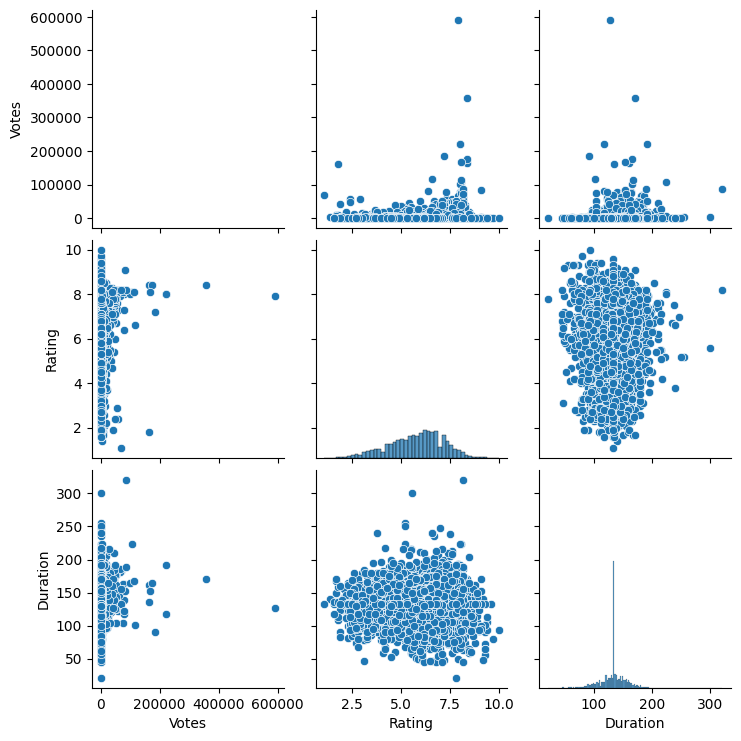

In [28]:
sns.pairplot(movie[['Votes', 'Rating', 'Duration']]);

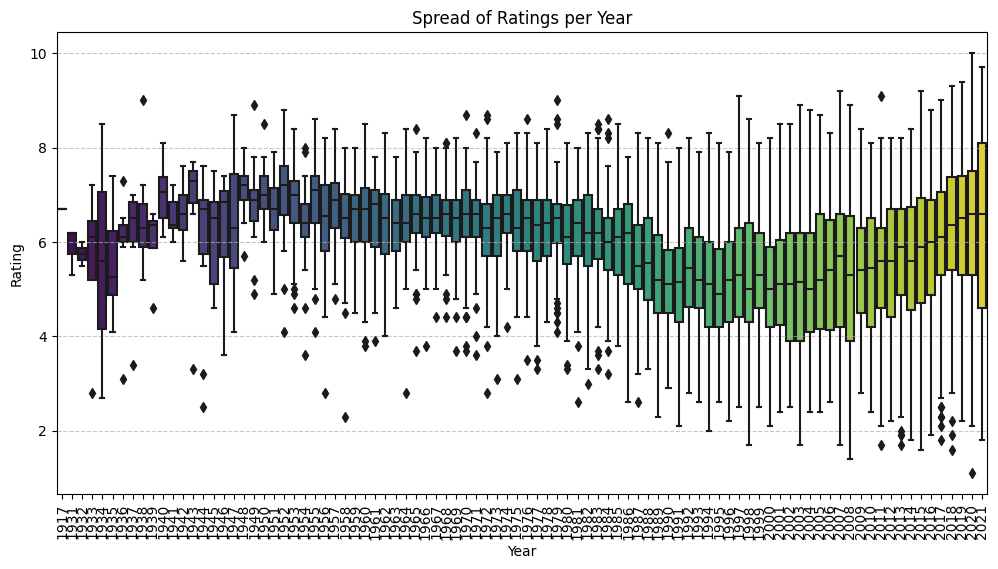

In [29]:
#box plot to show the spread of ratings per year
plt.figure(figsize=(12, 6))
sns.boxplot(data=movie, x='Year', y='Rating', palette='viridis')
plt.title('Spread of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [30]:
movie = movie.drop(columns=['Name'])
print(movie.head())

   Year  Duration                      Genre  Rating  Votes        Director  \
1  2019     109.0                      Drama     7.0      8   Gaurav Bakshi   
3  2019     110.0            Comedy, Romance     4.4     35      Ovais Khan   
5  1997     147.0     Comedy, Drama, Musical     4.7    827    Rahul Rawail   
6  2005     142.0        Drama, Romance, War     7.4   1086  Shoojit Sircar   
8  2012      82.0  Horror, Mystery, Thriller     5.6    326   Allyson Patel   

           Actor 1                 Actor 2          Actor 3  \
1     Rasika Dugal          Vivek Ghamande    Arvind Jangid   
3          Prateik              Ishita Raj  Siddhant Kapoor   
5       Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor   
6  Jimmy Sheirgill          Minissha Lamba   Yashpal Sharma   
8        Yash Dave          Muntazir Ahmad     Kiran Bhatia   

                                          All_Actors  
1        Rasika Dugal, Vivek Ghamande, Arvind Jangid  
3               Prateik, Ishita Raj,

**Tagret Encoding**

In [31]:
actor1_encoding_map = movie.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = movie.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = movie.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = movie.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = movie.groupby('Genre').agg({'Rating': 'mean'}).to_dict()


In [32]:
movie['actor1_encoded'] = round(movie['Actor 1'].map(actor1_encoding_map['Rating']),1)
movie['actor2_encoded'] = round(movie['Actor 2'].map(actor2_encoding_map['Rating']),1)
movie['actor3_encoded'] = round(movie['Actor 3'].map(actor3_encoding_map['Rating']),1)
movie['director_encoded'] = round(movie['Director'].map(director_encoding_map['Rating']),1)
movie['genre_encoded'] = round(movie['Genre'].map(genre_encoding_map['Rating']),1)

In [33]:
movie.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
movie.head()

,Year,Duration,Rating,Votes,All_Actors,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,"Prateik, Ishita Raj, Siddhant Kapoor",5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",5.6,5.9,5.6,5.6,5.5


In [34]:
movie = movie.drop(columns=['All_Actors'])
print(movie.head())

   Year  Duration  Rating  Votes  actor1_encoded  actor2_encoded  \
1  2019     109.0     7.0      8             6.8             7.0   
3  2019     110.0     4.4     35             5.4             4.4   
5  1997     147.0     4.7    827             4.8             5.8   
6  2005     142.0     7.4   1086             5.3             6.0   
8  2012      82.0     5.6    326             5.6             5.9   

   actor3_encoded  director_encoded  genre_encoded  
1             7.0               7.0            6.3  
3             4.4               4.4            5.7  
5             5.8               5.4            6.2  
6             6.5               7.5            6.8  
8             5.6               5.6            5.5  


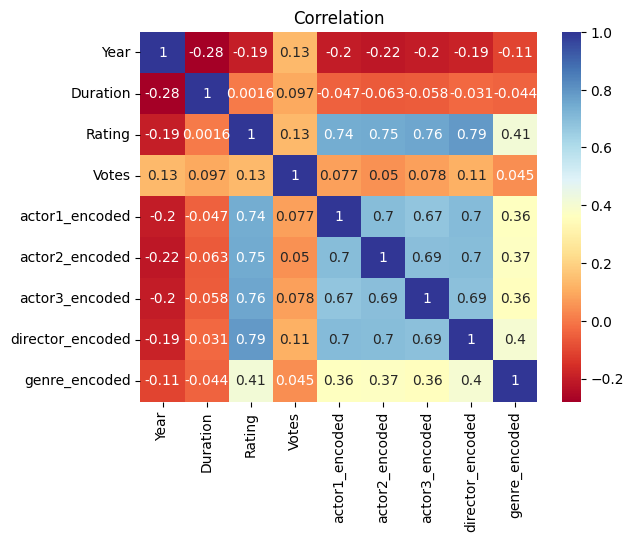

In [35]:
sns.heatmap(movie.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [36]:
X = movie.drop('Rating', axis=1)
y = movie['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,326,5.6,5.9,5.6,5.6,5.5


# **Model Construction and Evaluation**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (6046, 8)
Shape of training target:  (6046,)
Shape of testing features:  (1512, 8)
Shape of testing target:  (1512,)


In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Ridge Regression model with the default alpha
ridge_model = Ridge()

#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model on the training data
ridge_model.fit(X_train, y_train)

#predictions on the test data
y_pred = ridge_model.predict(X_test)

#Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.44828420120753665
Mean Absolute Error: 0.4983951955722052
R-squared (R2) Score: 0.758055291925894


In [40]:
import pandas as pd

results = pd.DataFrame({
    'Actual': y_test,  # Actual target values
    'Predicted': y_pred  # Predicted target values
})

results['Squared Error'] = (results['Actual'] - results['Predicted'])**2  # Squared errors
results['Absolute Error'] = abs(results['Actual'] - results['Predicted'])  # Absolute errors

#Results
print(results)


       Actual  Predicted  Squared Error  Absolute Error
6241      7.4   6.617459       0.612371        0.782541
3321      4.9   5.485226       0.342490        0.585226
6117      6.5   6.324054       0.030957        0.175946
5975      5.7   5.552979       0.021615        0.147021
6653      7.0   6.973325       0.000712        0.026675
...       ...        ...            ...             ...
13618     6.3   6.074428       0.050883        0.225572
11911     6.3   5.735446       0.318721        0.564554
14552     7.2   6.940103       0.067547        0.259897
7792      6.8   7.208617       0.166968        0.408617
14312     4.9   5.572025       0.451618        0.672025

[1512 rows x 4 columns]


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.44828860955357486
Mean Absolute Error: 0.4983995226829543
R-squared (R2) Score: 0.7580529126852417


In [42]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Squared Error': (y_test - y_pred)**2,
    'Absolute Error': abs(y_test - y_pred)
})

#results DataFrame
print(results)

       Actual  Predicted  Squared Error  Absolute Error
6241      7.4   6.617484       0.612331        0.782516
3321      4.9   5.485182       0.342438        0.585182
6117      6.5   6.324062       0.030954        0.175938
5975      5.7   5.552979       0.021615        0.147021
6653      7.0   6.973330       0.000711        0.026670
...       ...        ...            ...             ...
13618     6.3   6.074449       0.050873        0.225551
11911     6.3   5.735437       0.318731        0.564563
14552     7.2   6.940160       0.067517        0.259840
7792      6.8   7.208665       0.167007        0.408665
14312     4.9   5.572024       0.451617        0.672024

[1512 rows x 4 columns]


In [43]:
from sklearn.tree import DecisionTreeRegressor

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.44828860955357486
Mean Absolute Error: 0.4983995226829543
R-squared (R2) Score: 0.7580529126852417


In [44]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Squared Error': (y_test - y_pred)**2,
    'Absolute Error': abs(y_test - y_pred)
})

#results DataFrame
print(results)

       Actual  Predicted  Squared Error  Absolute Error
6241      7.4   6.617484       0.612331        0.782516
3321      4.9   5.485182       0.342438        0.585182
6117      6.5   6.324062       0.030954        0.175938
5975      5.7   5.552979       0.021615        0.147021
6653      7.0   6.973330       0.000711        0.026670
...       ...        ...            ...             ...
13618     6.3   6.074449       0.050873        0.225551
11911     6.3   5.735437       0.318731        0.564563
14552     7.2   6.940160       0.067517        0.259840
7792      6.8   7.208665       0.167007        0.408665
14312     4.9   5.572024       0.451617        0.672024

[1512 rows x 4 columns]


In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.38082114021164015
Mean Absolute Error: 0.431255291005291
R-squared (R2) Score: 0.7944659674626864


In [46]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Squared Error': (y_test - y_pred) ** 2,
    'Absolute Error': abs(y_test - y_pred)
})

#results DataFrame
print(results)

       Actual  Predicted  Squared Error  Absolute Error
6241      7.4      7.279       0.014641           0.121
3321      4.9      5.434       0.285156           0.534
6117      6.5      6.217       0.080089           0.283
5975      5.7      5.714       0.000196           0.014
6653      7.0      6.961       0.001521           0.039
...       ...        ...            ...             ...
13618     6.3      6.242       0.003364           0.058
11911     6.3      5.610       0.476100           0.690
14552     7.2      6.836       0.132496           0.364
7792      6.8      7.134       0.111556           0.334
14312     4.9      5.327       0.182329           0.427

[1512 rows x 4 columns]


               Model  Mean Squared Error  Mean Absolute Error  \
0   Ridge Regression            0.448284             0.498395   
1  Linear Regression            0.448289             0.498400   
2      Decision Tree            0.819074             0.628439   
3      Random Forest            0.380714             0.430289   

   R-squared (R2) Score  
0              0.758055  
1              0.758053  
2              0.557935  
3              0.794524  


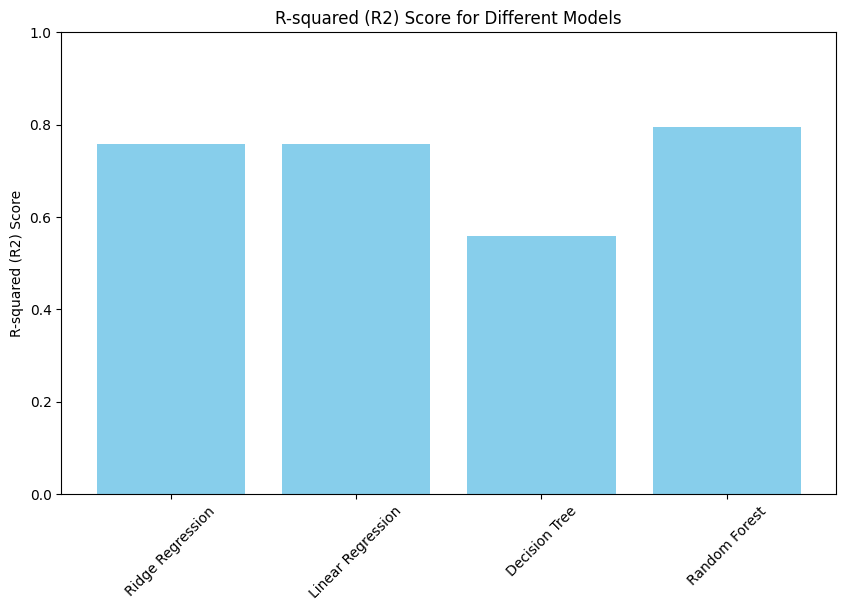

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Calculate evaluation metrics for each model
mse_ridge = mean_squared_error(y_test, ridge_pred)
mae_ridge = mean_absolute_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

mse_linear = mean_squared_error(y_test, linear_pred)
mae_linear = mean_absolute_error(y_test, linear_pred)
r2_linear = r2_score(y_test, linear_pred)

mse_decision_tree = mean_squared_error(y_test, tree_pred)
mae_decision_tree = mean_absolute_error(y_test, tree_pred)
r2_decision_tree = r2_score(y_test, tree_pred)

mse_random_forest = mean_squared_error(y_test, forest_pred)
mae_random_forest = mean_absolute_error(y_test, forest_pred)
r2_random_forest = r2_score(y_test, forest_pred)

#Storing results in a DataFrame
results = pd.DataFrame({
    'Model': ['Ridge Regression', 'Linear Regression', 'Decision Tree', 'Random Forest'],
    'Mean Squared Error': [mse_ridge, mse_linear, mse_decision_tree, mse_random_forest],
    'Mean Absolute Error': [mae_ridge, mae_linear, mae_decision_tree, mae_random_forest],
    'R-squared (R2) Score': [r2_ridge, r2_linear, r2_decision_tree, r2_random_forest]
})

#results
print(results)
results.to_csv('model_results.csv', index=False)

#Visualizing  the results
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R-squared (R2) Score'], color='skyblue')
plt.title('R-squared (R2) Score for Different Models')
plt.ylabel('R-squared (R2) Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
